Utilizando a base de dados do inpe, vamos realizar algumas análises sobre queimadas
https://queimadas.dgi.inpe.br/~rqueimadas/documentos/

1 - série histórica do ano de 2022, quais meses de maiores focos

2 - áreas mais afetadas 

3 - análise dos fatores ambientais, como precipitação e dias sem chuva

inicialmente realizando as análises com o satélite de referencia, o 'AQUA_M-T'

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(f'Focos_2022-01-01_2023-01-01.csv')
df.head(10)


,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,28.0,0.0,1.0,-7.45158,-44.46713,2.2
1,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,27.0,0.0,1.0,-7.45103,-44.47060,2.6
2,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,59.0,0.0,1.0,-7.44864,-44.39903,1.8
3,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,59.0,0.0,1.0,-7.44533,-44.39851,1.2
4,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,75.0,0.0,1.0,-7.43312,-44.82275,2.6
5,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,SEBASTIAO LEAL,Cerrado,89.0,0.0,1.0,-7.35500,-44.28152,1.5
6,2022/09/11 04:19:00,NOAA-20,Brasil,PIAUI,URUCUI,Cerrado,28.0,0.0,1.0,-7.24448,-44.48819,2.2
7,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,BENEDITO LEITE,Cerrado,79.0,0.0,1.0,-7.26667,-44.65174,3.4
8,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,SAO FELIX DE BALSAS,Cerrado,81.0,0.0,1.0,-7.21225,-44.84483,3.9
9,2022/09/11 04:19:00,NOAA-20,Brasil,MARANHAO,SAO FELIX DE BALSAS,Cerrado,78.0,0.0,1.0,-7.20840,-44.84777,3.9


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462901 entries, 0 to 1462900
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   datahora      1462901 non-null  object 
 1   satelite      1462901 non-null  object 
 2   pais          1462901 non-null  object 
 3   estado        1462901 non-null  object 
 4   municipio     1462901 non-null  object 
 5   bioma         1462901 non-null  object 
 6   diasemchuva   1417819 non-null  float64
 7   precipitacao  1417819 non-null  float64
 8   riscofogo     1417819 non-null  float64
 9   latitude      1462901 non-null  float64
 10  longitude     1462901 non-null  float64
 11  frp           1257010 non-null  float64
dtypes: float64(6), object(6)
memory usage: 133.9+ MB
None


In [77]:
df.value_counts('satelite')

satelite
NOAA-20      435201
GOES-16      415578
NPP-375      266563
NPP-375D     121104
AQUA_M-T      53956
TERRA_M-T     32178
NOAA-19       20282
TERRA_M-M     15964
NOAA-18D      10739
AQUA_M-M       7580
MSG-03         7536
NOAA-18        3219
METOP-B        2686
NOAA-19D       2149
METOP-C        1976
dtype: int64

In [85]:
df_aqua = df.loc[df['satelite'] == 'AQUA_M-T']
df_aqua

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
6086,2022/09/11 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,LUCIARA,Cerrado,119.0,0.0,1.0,-11.03418,-51.13377,44.6
6087,2022/09/11 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,SAO FELIX DO ARAGUAIA,Cerrado,119.0,0.0,1.0,-11.28284,-51.46022,15.6
6088,2022/09/11 17:09:00,AQUA_M-T,Brasil,MARANHAO,CAROLINA,Cerrado,89.0,0.0,1.0,-7.21349,-47.36106,25.4
6089,2022/09/11 17:09:00,AQUA_M-T,Brasil,MATO GROSSO,LUCIARA,Cerrado,119.0,0.0,1.0,-10.74953,-50.62254,65.9
6090,2022/09/11 17:09:00,AQUA_M-T,Brasil,MARANHAO,BALSAS,Cerrado,65.0,0.0,1.0,-7.40185,-45.90119,54.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1449644,2022/09/10 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,NOBRES,Cerrado,22.0,0.0,1.0,-14.63001,-56.28065,126.2
1449645,2022/09/10 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,NOBRES,Cerrado,22.0,0.0,1.0,-14.63426,-56.30448,106.6
1449646,2022/09/10 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,CHAPADA DOS GUIMARAES,Cerrado,22.0,0.0,1.0,-14.97996,-55.93599,29.1
1449647,2022/09/10 18:04:00,AQUA_M-T,Brasil,MATO GROSSO,ROSARIO OESTE,Cerrado,22.0,0.0,1.0,-14.98426,-55.96035,23.6


### 1. Análise temporal

In [86]:
df_date = pd.DataFrame(data=df_aqua, columns=['datahora'])

In [87]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53956 entries, 6086 to 1449648
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datahora  53956 non-null  object
dtypes: object(1)
memory usage: 843.1+ KB


In [88]:
#criar colunas de dia, mes e hora
datas = pd.DatetimeIndex(df_date['datahora'])
datas

DatetimeIndex(['2022-09-11 17:09:00', '2022-09-11 17:09:00',
               '2022-09-11 17:09:00', '2022-09-11 17:09:00',
               '2022-09-11 17:09:00', '2022-09-11 17:09:00',
               '2022-09-11 17:09:00', '2022-09-11 17:09:00',
               '2022-09-11 17:09:00', '2022-09-11 17:09:00',
               ...
               '2022-09-10 18:04:00', '2022-09-10 18:04:00',
               '2022-09-10 18:04:00', '2022-09-10 18:04:00',
               '2022-09-10 18:04:00', '2022-09-10 18:04:00',
               '2022-09-10 18:04:00', '2022-09-10 18:04:00',
               '2022-09-10 18:04:00', '2022-09-10 18:02:00'],
              dtype='datetime64[ns]', name='datahora', length=53956, freq=None)

In [89]:
df_date['mes']=datas.month
df_date['dia']=datas.day
df_date['ano']=datas.year
df_date['hora']=datas.hour

In [90]:
df_date.value_counts(['ano'])
#excluir os dados de 2023

ano 
2022    53956
dtype: int64

In [91]:
df_date.drop(df_date.query('ano==2023').index, inplace=True)

In [92]:
df_date.value_counts(['ano'], ascending=False)


ano 
2022    53956
dtype: int64

In [96]:
#horario com maiores ocorrências de incêndio
horario = df_date.value_counts(['hora'], ascending=False)


In [97]:
horario = horario.to_frame(name = 'contagem')
horario.head()

,contagem
hora,
16,33611
17,19674
18,451
15,220


In [98]:
horario.reset_index(inplace=True)
horario

,hora,contagem
0,16,33611
1,17,19674
2,18,451
3,15,220


<AxesSubplot:title={'center':'Focos por horário'}, xlabel='Horário', ylabel='Número de Focos'>

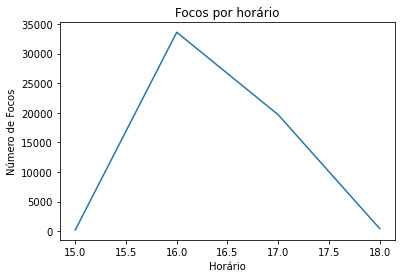

In [99]:
fig= sns.lineplot(data=horario, x='hora', y='contagem')
fig.set_xlabel("Horário")
fig.set_ylabel("Número de Focos")
fig.set(title='Focos por horário')


fig

In [100]:
pormes = df_date.value_counts(['mes'], ascending=False)


In [101]:
type(pormes)

pandas.core.series.Series

In [102]:
pormes = pormes.to_frame(name='contagem')

In [103]:
pormes.reset_index(inplace=True)

Aqui o gráfico que representa o numero de ocorrencias por mes, os meses de setembro e outrubro tem um aumento consideravel, 
mesmo em comparação com agosto, que é o mes com maior numero de ocorrências além deles. 

[Text(0.5, 1.0, 'Ocorrencia por mês')]

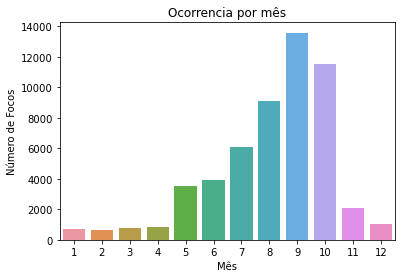

In [104]:
fig2 = sns.barplot(data=pormes, x='mes', y='contagem')
fig2.set_xlabel('Mês')
fig2.set_ylabel('Número de Focos')
fig2.set(title='Ocorrencia por mês')

### 2. Análise de área

In [105]:
df_estados = df_aqua.value_counts(['estado'])


In [106]:
df_estados.head

<bound method NDFrame.head of estado            
MARANHAO              14555
TOCANTINS             11107
MATO GROSSO            7109
PIAUI                  5523
BAHIA                  5289
GOIAS                  4478
MINAS GERAIS           4174
MATO GROSSO DO SUL      942
SAO PAULO               557
DISTRITO FEDERAL        202
PARANA                   16
RONDONIA                  4
dtype: int64>

In [107]:
df_municipio = df.value_counts(['municipio'])
df_municipio

municipio                 
BALSAS                        25726
MIRADOR                       21739
PIUM                          19282
ALTO PARNAIBA                 18852
SAO DESIDERIO                 18777
                              ...  
CANDIDO MOTA                      1
SAO SEBASTIAO DO RIO PRETO        1
ANGELICA                          1
PAULISTANIA                       1
RIBEIRAO DO SUL                   1
Length: 1315, dtype: int64

aqui estão os lideres de municipio e estado. como sera a relação dos dois? 

In [111]:
dflocais = df_aqua[['municipio', 'estado']]


In [112]:
dflocaiscontag = dflocais.value_counts()

In [113]:
dflocaiscontag = dflocaiscontag.sort_values(ascending=False)

Aqui a análise de municipios, o estado do maranhao que está em primeiro na contagem de estados também tem alguns dos 10 primeiros municipios com o maior numero de ocorrencias. 

In [114]:
dflocaiscontag.head(10)

municipio                estado     
MIRADOR                  MARANHAO       1003
ALTO PARNAIBA            MARANHAO        981
BALSAS                   MARANHAO        961
FORMOSO DO ARAGUAIA      TOCANTINS       791
FERNANDO FALCAO          MARANHAO        730
LAGOA DA CONFUSAO        TOCANTINS       695
CAMPINAPOLIS             MATO GROSSO     581
URUCUI                   PIAUI           561
MATEIROS                 TOCANTINS       548
BAIXA GRANDE DO RIBEIRO  PIAUI           545
dtype: int64

### 3. Análise de alguns fatores ambientais

In [116]:
#retirar valores nulos e com erro

df_aqua[df_aqua['diasemchuva'].isnull()]

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp


retirei os NaN dos dias sem chuva, que eram basicamente onde estava faltando dados nas outras colunas


In [117]:
#retirar valores que apresentam erro

df_aqua.drop(df_aqua.query('diasemchuva == -999').index, inplace=True)

C:\Users\lucas\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
print('min', df_aqua['diasemchuva'].min())
print('max', df_aqua['diasemchuva'].max())

min 0.0
max 357.0


In [120]:
print('minrisco', df_aqua['riscofogo'].min())
print('maxrisco', df_aqua['riscofogo'].max())

minrisco 0.0
maxrisco 1.0


In [69]:
df.query('riscofogo == -999')

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp


In [33]:
df.drop(df.query('riscofogo == -999').index, inplace=True)

In [70]:
print('chuvamin', df['precipitacao'].min())
print('chuvamax', df['precipitacao'].max())

chuvamin 0.0
chuvamax 126.33


In [121]:
chuvas = df_aqua['precipitacao'].sort_values(ascending=False)
chuvas

649795    101.71
649798     89.21
685328     72.06
685326     71.91
685327     71.75
           ...  
619985      0.00
619986      0.00
619987      0.00
619988      0.00
823970      0.00
Name: precipitacao, Length: 53956, dtype: float64

In [125]:
df_aqua[['diasemchuva', 'riscofogo']].corr()

,diasemchuva,riscofogo
diasemchuva,1.000000,0.387501
riscofogo,0.387501,1.000000
